## Algorithmic Question

### Import the modules

In [1]:
import networkx as nx # to build the graph
import matplotlib.pyplot as plt # to plot the graph
from itertools import groupby

### The Graph

* We build the graph using the $grid\_2d\_graph$ from the $networkx$ package that returns a 2D **grid graph**, with $n,m=3$.
* The grid graph has each node connected to its nearest neighbors: two if it's a corner node ($node1$), three if it's an edge node ($node2$) and four if it's a center node ($node5$).
* This produces a graph with $9$ nodes and $12$ edges connecting the nodes. Each edge represents one of the possible line segment composing Sarah's phone password.

In [2]:
G = nx.grid_2d_graph(3, 3)

* Below we find a plot that helps us better visualize the graph.

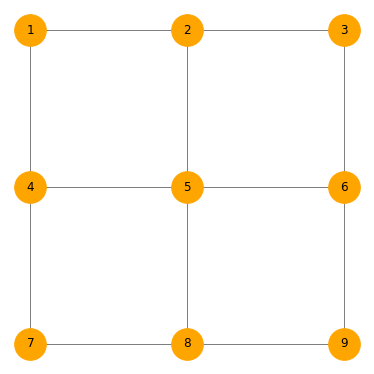

In [3]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()} # position of the nodes
labels = dict([(key, i+1) for i, key in enumerate(pos)]) # labels of the nodes
nx.draw(G, pos=pos,
        labels=labels,
        node_color='orange', 
        with_labels=True,
        node_size=1000,
        width=0.5)

### The Algorithm

In [4]:
# the user inserts the input, let's for example test 'DRU'
string = str(input('Insert the directions here: '))

Insert the directions here: DRU


In [5]:
print("The nodes of the graph G are", G.nodes())

The nodes of the graph G are [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


#### get_all_paths

* First we define the function $get\_all\_paths$ that takes as inputs the $Graph$, $node1$ and $node2$ and returns the list of    all paths linking the two nodes.
* To do so, we exploit the $Networkx$ built-in function called $all\_simple\_paths$ which lists all the paths (no loops or intersections) between $node1$ and $node2$.
* Each node is defined as a tuple of two integers that explain the *position* of the node in the graph. The numbers in the tuple refer to the position of the node in the graph with respect to the x-axis and the y-axis. For instance, $node 1$ is in position $(0,0)$, $node 2$ is in position $(1,0)$, $node 5$ is in position $(1,1)$, $node 9$ is in position $(2,2)$ and so on.

In [6]:
def get_all_paths(Graph, node1, node2):
    
    return [path for path in nx.all_simple_paths(Graph, node1, node2)]

print("The number of different patterns is equal to:", len(get_all_paths(G, (0, 1), (0, 2))))

The number of different patterns is equal to: 8


#### get_possible_paths

* We define another function $get\_possible\_paths$ that takes as inputs the $Graph$, $node1$, $node2$ and the $string$ which indicates the possible *ordered directions* that can be followed travelling across the graph.
* Therefore, we must choose only those paths (among all the paths) that go in certain specific directions, the ones imposed by the $string$.
* First, we get $all\_paths$ between $node1$ and $node2$ using the previously defined function $get\_all\_paths$.
* We reverse the order of the nodes in each path in $all\_paths$ and append the reversed paths $rev\_all\_paths$ to $all\_paths$ as we can travel across the graph in both directions *(bidirectional graph)*.
* Then, for each path we check the directions that are taken and store them into a string called $direct$.
  * **Right** if $node2[1] > node1[1]$. For instance, if we move from node-2 $(0,1)$ to node-3 $(0,2)$ we are moving one step to the      right. 
  * **Left** if $node2[1] < node1[1]$. 
  * **Down** if $node2[0] > node1[0]$. For instance, if we move from node-1 $(0,0)$ to node-4 $(1,0)$ we are moving one step to the      down. 
  * **Up** if $node2[0] < node1[0]$.
* Finally, we compare $direct$ with $string$ and choose only those paths that match the required directions imposed by $string$.
* The function outputs the number of paths ($count$) as well as the list of paths itself ($poss\_paths$).

In [ ]:
def get_possible_paths(Graph, node1, node2, string):
    
    all_paths = get_all_paths(Graph, node1, node2)
    rev_all_paths = [list(reversed(lst)) for lst in all_paths]
    all_paths = all_paths + rev_all_paths
    
    count = 0
    poss_paths = []

    for path in all_paths:
        direct = ""
        for node in range(0, len(path)-1):
            source = path[node]
            target = path[node+1]
            if target[1] > source[1]:
                direct += "R"
            elif target[1] < source[1]:
                direct += "L"
            elif target[0] > source[0]:
                direct += "D"
            elif target[0] < source[0]:
                direct += "U"  
        
        lst = [*string]
        lst_unique = [key for key, _group in groupby([*direct])]
        if lst == lst_unique:
            count += 1
            poss_paths.append(path)
        
    return count, poss_paths

* We can see that from the 8 paths that exist between node $(0,1)$ and node $(0,2)$, only 2

In [7]:
print(get_possible_paths(G, (0, 1), (0, 2), 'DRU'))

(2, [[(0, 1), (1, 1), (2, 1), (2, 2), (1, 2), (0, 2)], [(0, 1), (1, 1), (1, 2), (0, 2)]])


#### guess_my_password

* The last function called $guess\_my\_password$ takes as inputs the $Graph$, $string$ and the $labels$ that convert the node names $\{(0,0), (0,1) ... (2,2)\}$ to integer numbers from 1 to 9 that allow us to follow more easily the plot of the graph when checking the correctness of our algorithm.
* For each pair of nodes ($node1$, $node2$) we count the number of paths that follow the directions dictated by $string$ using the previously defined function $get\_possible\_paths$.
* we output the number ($count$) of possible patterns Alex has to try based on those directions to guess Sarah's password as well as the $count$ paths stored in a list named $poss\_paths\_num$.

In [8]:
def guess_my_password(Graph, string, labels):
    
    count = 0
    visited = []
    poss_paths = []
    
    for node1 in list(Graph.nodes()):
        for node2 in list(Graph.nodes()):
            if node1 != node2:
                if (node2, node1) not in visited:
                    visited.append((node2, node1))
                    visited.append((node1, node2))
                    count += get_possible_paths(Graph, node1, node2, string)[0]
                    path = get_possible_paths(Graph, node1, node2, string)[1]
                    
                    if len(path) > 0:
                        for sub in path:
                            poss_paths.append(sub)
    
    # change the name of the nodes in the path to integer numbers
    poss_paths_num = []
    for path in poss_paths:
        p = []
        for node in path:
            p.append(labels[node])    
        poss_paths_num.append(p)
                
    return count, poss_paths_num, poss_paths

#### Example 1

* Let's suppose that $string$ is equal to **'DRU'**. This means that the paths must follow those specific directions in that specific order (**Down-Right-Up**).
* In this case, the number of possible different patterns is 15.
* We can also see listed the paths.

In [9]:
count = guess_my_password(G, 'DRU', labels)[0]
poss_paths_num = guess_my_password(G, 'DRU', labels)[1]

print("The number of different patterns that only follow the directions Down-Right-Up is equal to:", count)

The number of different patterns that only follow the directions Down-Right-Up is equal to: 15


In [10]:
print(*poss_paths_num)

[1, 4, 7, 8, 5, 2] [1, 4, 5, 2] [1, 4, 7, 8, 9, 6, 3] [1, 4, 5, 6, 3] [1, 4, 7, 8, 5] [1, 4, 7, 8, 9, 6] [2, 5, 8, 9, 6, 3] [2, 5, 6, 3] [4, 7, 8, 5, 2] [2, 5, 8, 9, 6] [4, 7, 8, 9, 6, 3] [5, 8, 9, 6, 3] [4, 7, 8, 5] [4, 7, 8, 9, 6] [5, 8, 9, 6]


#### plot of the first Down-Right-Up path

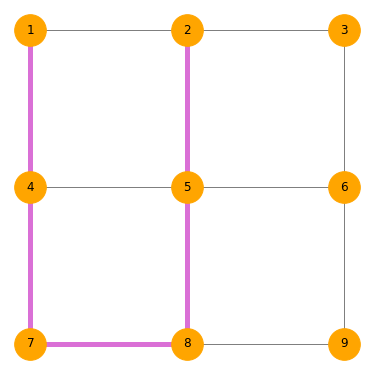

In [11]:
poss_paths = guess_my_password(G, 'DRU', labels)[2]
edges = [(path[node], path[node+1]) for path in poss_paths[:1] for node in range(len(path)-1)]
edges = [tup[::-1]  for tup in edges] + edges
edge_color = ['orchid' if edge in edges else 'black' for edge in G.edges()]
edge_width = [5 if edge in edges else 0.5 for edge in G.edges()]

plt.figure(figsize=(5,5))
nx.draw(G, pos=pos,
        labels=labels,
        node_color='orange', 
        with_labels=True,
        node_size=1000,
        edge_color=edge_color,
        width=edge_width)

#### Example 2

* Now, let's suppose that Sarah only moved her finger to the right. There obviously only are 9 possible combinantions of nodes. The same reasoning applies to only left, up or down.

In [12]:
count = guess_my_password(G, 'R', labels)[0]
poss_paths = guess_my_password(G, 'R', labels)[1]

print("The number of different patterns that only follow the direction Right is equal to:", count)

The number of different patterns that only follow the direction Right is equal to: 9


In [13]:
print(*poss_paths)

[1, 2] [1, 2, 3] [2, 3] [4, 5] [4, 5, 6] [5, 6] [7, 8] [7, 8, 9] [8, 9]


#### Example 3

* The combination of these directions produces a path where at least one node is repeated leading to an interesection. Therefore, the number of different patters following those specific directions is zero.

In [14]:
count = guess_my_password(G, 'LDRDRUL', labels)[0]
poss_paths = guess_my_password(G, 'LDRDRUL', labels)[1]

print("The number of different patterns that follow the directions Left-Down-Right-Down-Right-Up-Left is equal to:", count)

The number of different patterns that follow the directions Left-Down-Right-Down-Right-Up-Left is equal to: 0
